### Visualization from lecture to get an overview

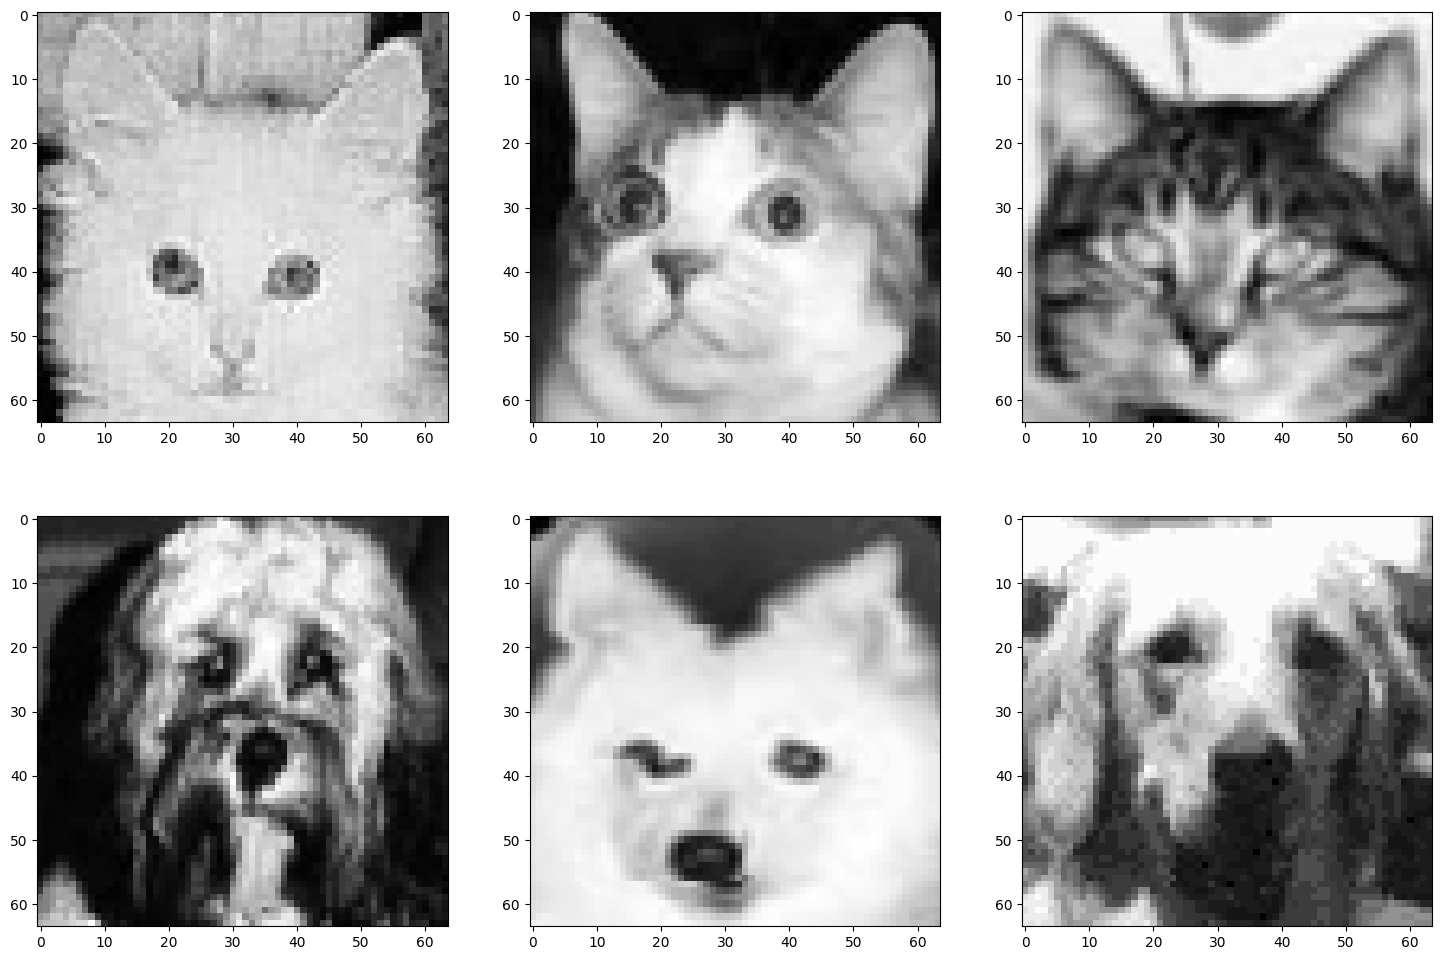

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import trange

CATSnDOGS = np.array(pd.read_csv("CATSnDOGS.csv"))
Labels = np.array(pd.read_csv("Labels.csv"))


def rotateM(x):
    return np.transpose(np.apply_along_axis(np.flip, 0, x))

np.random.seed(1000012)
ssc = np.random.choice(np.where(Labels == 0)[0], 3, replace=False)
ssd = np.random.choice(np.where(Labels == 1)[0], 3, replace=False)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for i in range(3):
    axes[0][i].imshow(rotateM(np.reshape(CATSnDOGS[ssc[i], :], (64, 64))), cmap='gray')
    axes[0][i].set_xlabel("")
    axes[0][i].set_ylabel("")
    
for i in range(3):
    axes[1][i].imshow(rotateM(np.reshape(CATSnDOGS[ssd[i], :], (64, 64))), cmap='gray')
    axes[1][i].set_xlabel("")
    axes[1][i].set_ylabel("")

plt.show()

## Class separation

In [ ]:
def get_misclassified_indices(clf, features, labels, dataset):
    # Make predictions on the input data
    y_pred = clf.predict(features)
    
    # Find misclassified samples
    misclassified_idx = [i for i in range(len(labels)) if labels[i] != y_pred[i]]
    misclassified = features[misclassified_idx]
    
    # Find indices of misclassified samples in the original dataset
    indices = []
    for i in range(misclassified.shape[0]):
        image = misclassified[i,:]
        idx = np.where((dataset==image).all(axis=1))[0][0]
        indices.append(idx)
    
    return indices

In [ ]:
# Classifiers
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)


svm = make_pipeline(
    StandardScaler(),
    SVC()
)

rf = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

mlp = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(100,))
)


In [4]:
lr_list = []
svm_list = []
rf_list = []
mlp_list = []

iterations = 200
for i in trange(iterations):
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(CATSnDOGS, Labels.ravel(), test_size=0.2)

    # Train the classifiers using the pipeline
    lr.fit(train_features, train_labels)
    svm.fit(train_features, train_labels)
    rf.fit(train_features, train_labels)
    mlp.fit(train_features, train_labels)

    # Make predictions on the testing data and calculate the accuracies
    lr_pred = lr.predict(test_features)
    lr_acc = accuracy_score(test_labels, lr_pred)

    svm_pred = svm.predict(test_features)
    svm_acc = accuracy_score(test_labels, svm_pred)

    rf_pred = rf.predict(test_features)
    rf_acc = accuracy_score(test_labels, rf_pred)

    mlp_pred = mlp.predict(test_features)
    mlp_acc = accuracy_score(test_labels, mlp_pred)

    
    lr_list.append(lr_acc)
    svm_list.append(svm_acc)
    rf_list.append(rf_acc)
    mlp_list.append(mlp_acc)
    
    
# Print the test accuracies
print("Logistic Regression Accuracy:", np.mean(lr_list))
print("Support Vector Machine Accuracy:", np.mean(svm_list))
print("Random Forest Accuracy:", np.mean(rf_list))
print("MLP Accuracy:", np.mean(np.mean(mlp_list)))

Logistic Regression Accuracy: 0.7527499999999999
Support Vector Machine Accuracy: 0.8022499999999999
Random Forest Accuracy: 0.7502500000000001
MLP Accuracy: 0.7855


### Reflection
Based on the results of the classifiers tested, it appears that the cats and dogs are relatively well separated, with classification accuracies ranging from 75% to 80%. This suggests that there is some overlap between the two categories, but the classifiers are still able to distinguish between them with a relatively high degree of accuracy. It may be useful to explore other metrics beyond accuracy, such as precision, recall, and F1-score, in order to get a more comprehensive picture of the performance of the classifiers.

In [54]:
def common(counts, threshold):
    most_common = []
    for key, count in counts.items():
        if count > threshold:
            most_common.append(key)
    most_common = sorted(most_common, key=lambda key: counts[key], reverse=True)
    return most_common

In [123]:
from collections import Counter

# Define lists to store the misclassified indices for each classifier
lr_indices_list = []
svm_indices_list = []
rf_indices_list = []
mlp_indices_list = []
all_indices = []

iterations = 1000


for i in trange(iterations):
    
    # Split the data into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(CATSnDOGS, Labels.ravel(), test_size=0.2)

    # Train the classifiers using the pipeline
    lr.fit(train_features, train_labels)
    svm.fit(train_features, train_labels)
    rf.fit(train_features, train_labels)
    mlp.fit(train_features, train_labels)

    # Make predictions on the testing data
    lr_pred = lr.predict(test_features)
    svm_pred = svm.predict(test_features)
    rf_pred = rf.predict(test_features)
    mlp_pred = mlp.predict(test_features)

    # Get misclassified indices for each classifier and store them in separate lists
    lr_indices = get_misclassified_indices(lr, test_features, test_labels, CATSnDOGS)
    lr_indices_list = lr_indices_list + lr_indices
    
    svm_indices = get_misclassified_indices(svm, test_features, test_labels, CATSnDOGS)
    svm_indices_list = svm_indices_list + svm_indices
    
    rf_indices = get_misclassified_indices(rf, test_features, test_labels, CATSnDOGS)
    rf_indices_list = rf_indices_list + rf_indices
    
    mlp_indices = get_misclassified_indices(mlp, test_features, test_labels, CATSnDOGS)
    mlp_indices_list = mlp_indices_list + mlp_indices

    indices = lr_indices + svm_indices + rf_indices + mlp_indices
    all_indices = all_indices + indices


    
    
lr_counts = Counter(lr_indices_list)
svm_counts = Counter(svm_indices_list)
rf_counts = Counter(rf_indices_list)
mlp_counts = Counter(mlp_indices_list) 
    
## For separate classifiers
threshold_sep = iterations*0.2
lr_common = common(lr_counts, threshold_sep)
svm_common = common(svm_counts, threshold_sep)
rf_common = common(rf_counts, threshold_sep)
mlp_common = common(mlp_counts, threshold_sep)

# Find common elements between Logistic Regression and SVM
lr_svm_common = set(lr_common).intersection(set(svm_common))

# Find common elements between Logistic Regression, SVM, and Random Forest
lr_svm_rf_common = set(lr_common).intersection(set(svm_common)).intersection(set(rf_common))

# Find common elements between all arrays
all_common = set(lr_common).intersection(set(svm_common)).intersection(set(rf_common)).intersection(set(mlp_common))

print('Common elements between Logistic Regression and SVM:', lr_svm_common)
print('Common elements between Logistic Regression, SVM, and Random Forest:', lr_svm_rf_common)
print('Common elements between all arrays:', all_common)


## For all classifiers
# If a image was misclassified more than 20% of the time
counts = Counter(all_indices)
nr_clfs = 4
threshold = nr_clfs * iterations * 0.2
most_common = common(counts, threshold)

# Print most common misclassified images
print(f'Most common misclassified images: {most_common}')

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [32:43<00:00,  1.96s/it]

Common elements between Logistic Regression and SVM: {37, 8, 12, 114, 117, 151, 93}
Common elements between Logistic Regression, SVM, and Random Forest: {37, 8, 12, 114, 117, 151, 93}
Common elements between all arrays: {37, 8, 114, 117, 151, 93}
Most common misclassified images: [37, 114, 8, 151, 117, 93]


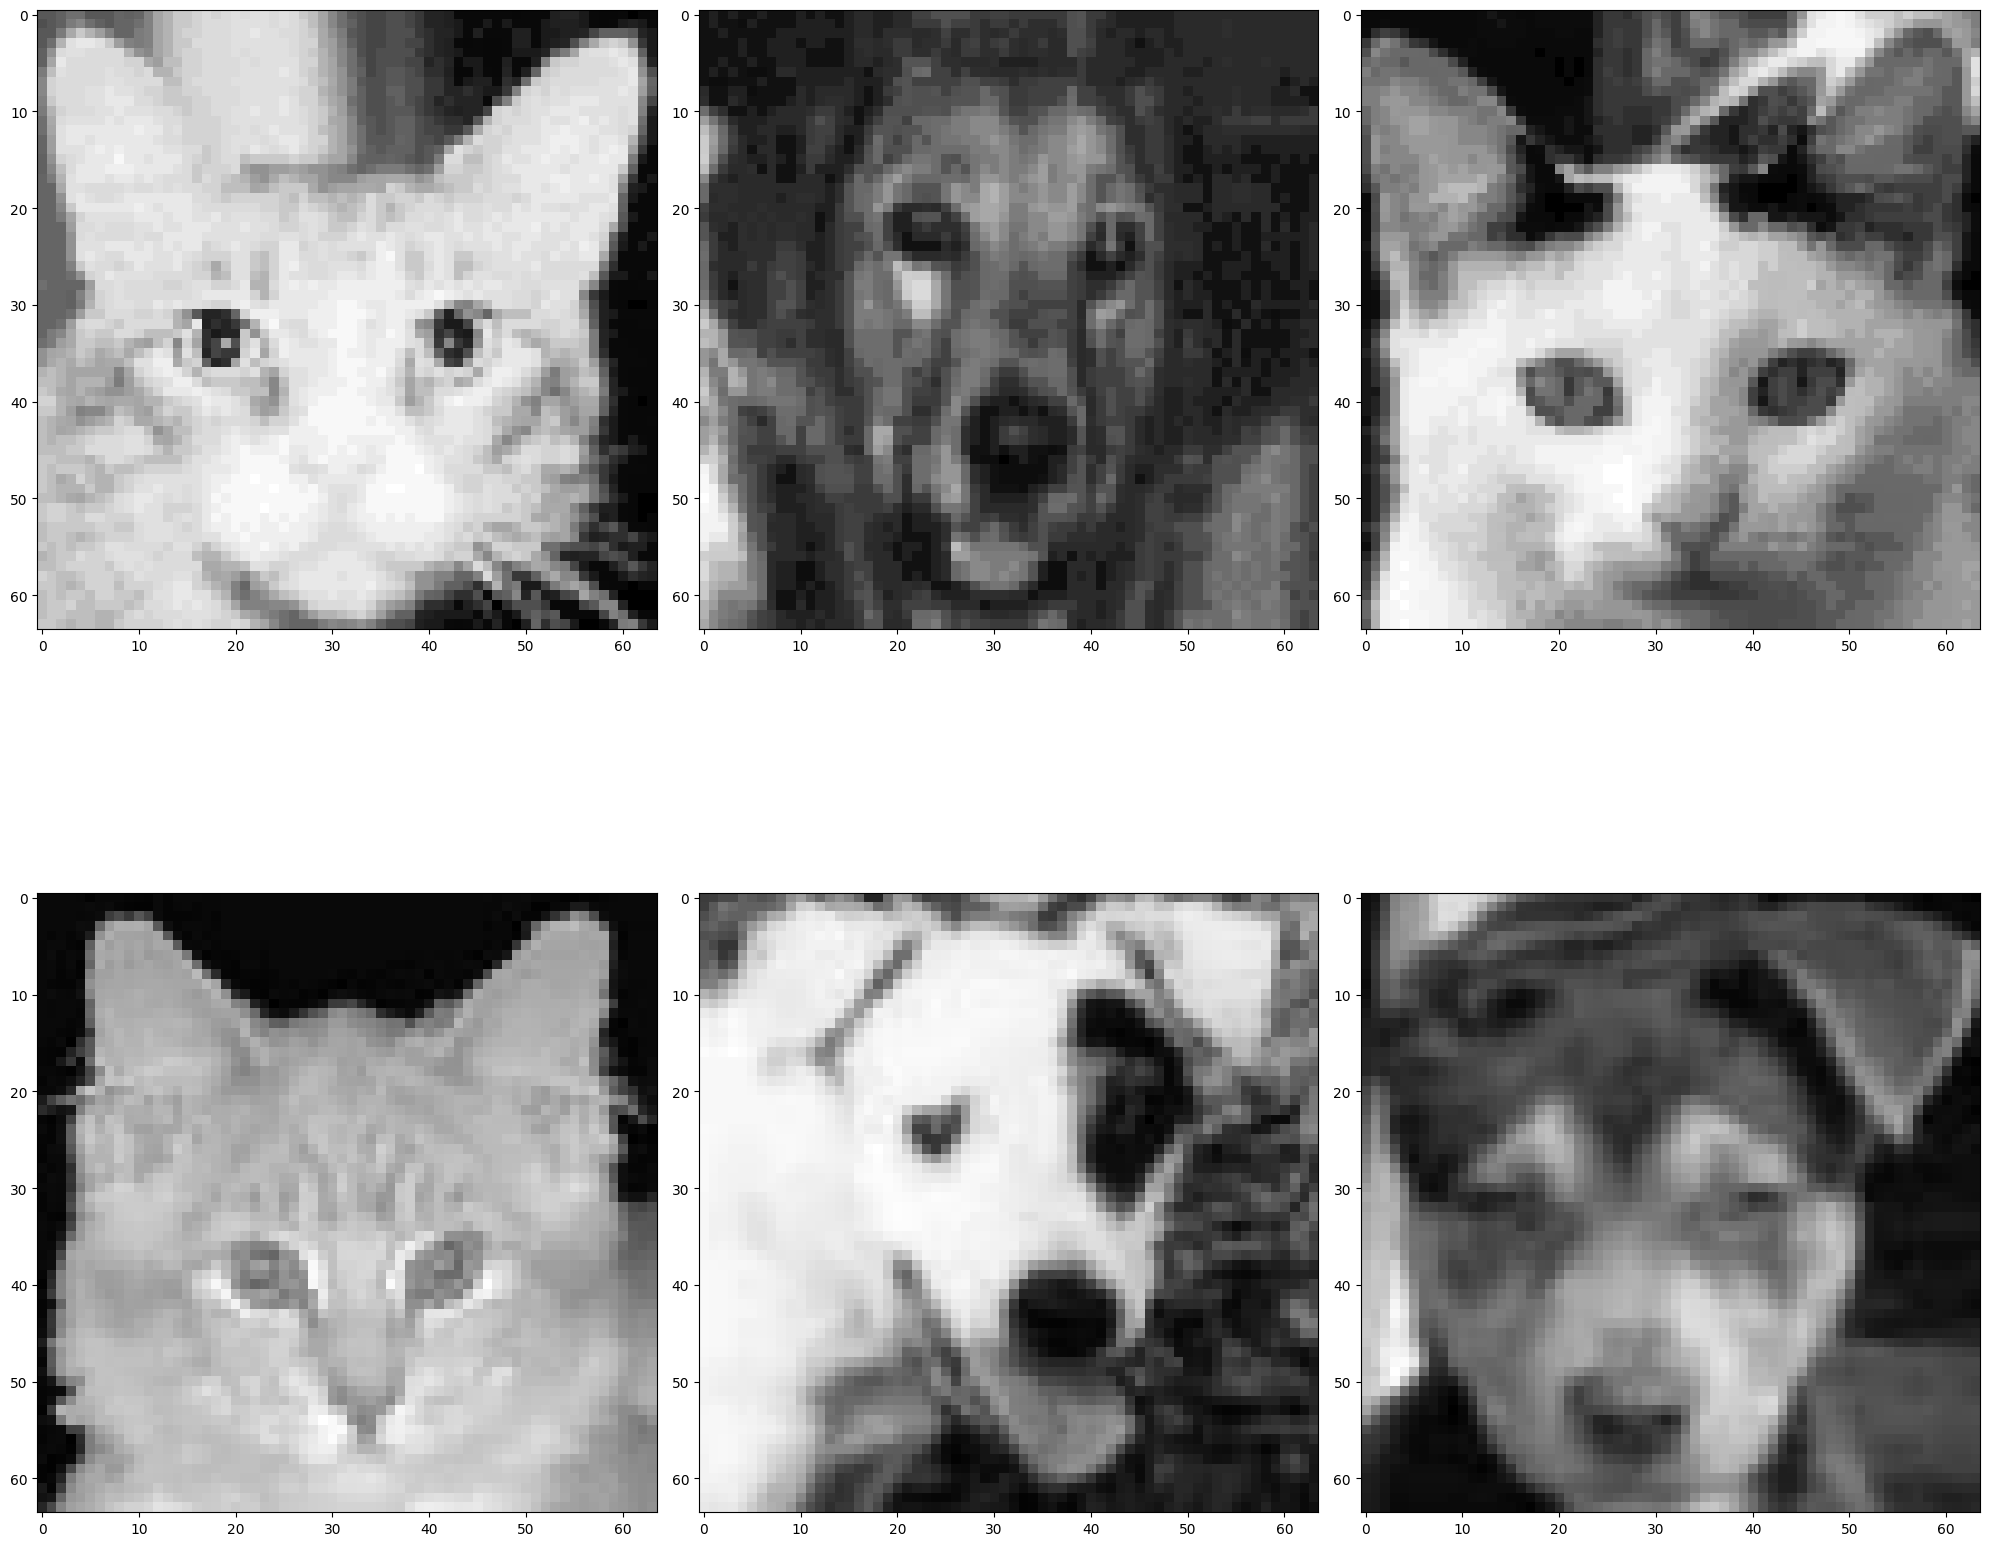

In [125]:
# Show the 6 most misclassified images
rows = 2
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
id = 0
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(rotateM(np.reshape(CATSnDOGS[most_common[id], :], (64, 64))), cmap='gray')
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")
        id += 1
plt.tight_layout()

### Reflection
Several images of cats and dogs are consistently misclassified by all classifiers, particularly those featuring pets with sharply pointed ears. This is likely due to the similarity in shape between the ears of cats and dogs, making it difficult for the models to differentiate between the two. Additionally, the presence of eyes with little difference in color between pupil and iris may also pose a challenge for accurate classification.

## Feature selection
Identify the most important pixels for classification - are these easy to identify or is there uncertainty in the selection of important features? Compare at least 2 methods for selecting/identifying features. Note, does not need to be the same methods as in 1a. Can you think of a way to improve on the stability of selection/identification?

Can you explain why these pixels are selected/are deemed important?

Do the identified predictive features differ between the classification methods?

In [79]:
def filter_counter_dict(counter_dict, threshold):
    filtered_dict = {}
    for key, value in counter_dict.items():
        if value > threshold:
            filtered_dict[key] = value
    return filtered_dict

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_feature_counts(feature_counts, title):
    # Create bar plot
    sns.barplot(x=list(feature_counts.keys()), y=list(feature_counts.values()), color='blue')
    
    # Set x-axis label
    plt.xlabel('Feature index')

    # Set y-axis label
    plt.ylabel('Count')

    # Rotate x-axis ticks for better readability
    plt.xticks(rotation=90)
    
    plt.title(title)
    # Show the plot
    plt.show()




In [156]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from tqdm import trange

reg_list = []
tree_list = []
combined_list = []
nr_iterations = 300

for i in trange(nr_iterations):
    # Split data
    train_features, test_features, train_labels, test_labels = train_test_split(CATSnDOGS, Labels.ravel(), test_size=0.2)

    # Regularization method
    lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, max_iter=10000).fit(train_features, train_labels)
    model = SelectFromModel(lsvc, prefit=True)
    important_features = model.transform(train_features)

    # Get the indices of the selected features
    selected_indices = model.get_support(indices=True).tolist()
    reg_list += selected_indices
    
    # Tree-based feature selection
    n_jobs = -1
    forest = RandomForestClassifier(n_estimators=750, n_jobs=n_jobs)
    forest.fit(train_features, train_labels)
    importances = forest.feature_importances_
    
    # Get the indices of the most important features
    important_indices = importances.argsort()[::-1]
    important_indices = important_indices[:len(selected_indices)].tolist() #Only take as many as the indices of regularized
    tree_list += important_indices
    
    
combined_list = tree_list + reg_list

reg_counts = Counter(reg_list)
tree_counts = Counter(tree_list)
combined_counts = Counter(combined_list)
    


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [16:59<00:00,  3.40s/it]


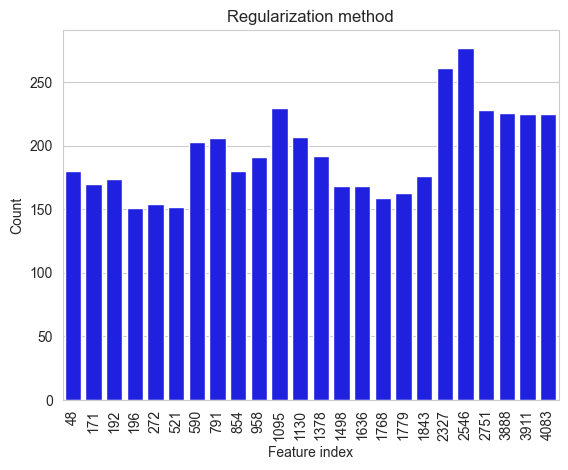

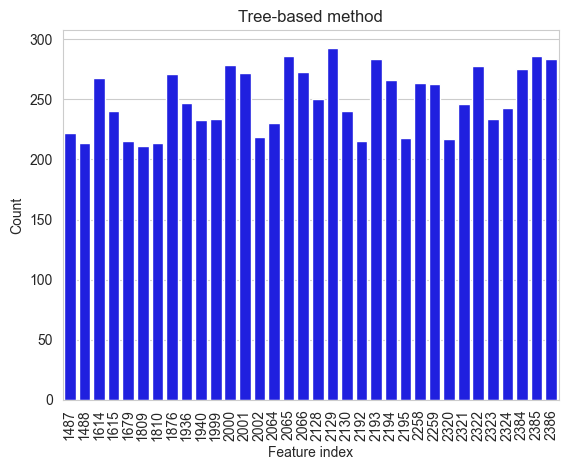

In [160]:
threshold = nr_iterations * 0.5
filtered_dict_reg = filter_counter_dict(reg_counts, threshold)

threshold = nr_iterations * 0.7
filtered_dict_tree = filter_counter_dict(tree_counts, threshold)

plot_feature_counts(filtered_dict_reg, 'Regularization method')
plot_feature_counts(filtered_dict_tree, 'Tree-based method')

In [163]:
# Only consider features that have been selected 20% of the time
threshold = nr_iterations * 0.2
most_selected_features_reg = common(reg_counts, threshold)
most_selected_features_tree = common(tree_counts, threshold)
common_features = set(most_selected_features_reg).intersection(set(most_selected_features_tree))
print(f'Most selected features by reg: {most_selected_features_reg}')
print(f'Most selected features by tree: {most_selected_features_tree}')
print(f'Common features picked by both classifiers: {common_features}')

Most selected features by reg: [2546, 2327, 1095, 2751, 3888, 3911, 4083, 1130, 791, 590, 1378, 958, 48, 854, 1843, 192, 171, 1498, 1636, 1779, 1768, 272, 521, 196, 1705, 344, 3017, 971, 3847, 3, 3912, 3369, 1101, 2038, 3194, 895, 2531, 2386, 3586, 2937, 1951, 3372, 1704, 1778, 3970, 1497, 1486, 1634, 3801, 3434, 2111, 25, 1642, 2852, 4086, 3320, 3169, 3366, 4044, 55, 2756, 1654, 2030, 1092, 49, 3257, 3433, 1952, 523, 3633, 1161, 1319, 2495, 1117, 3457, 2037, 2217, 1572, 2623, 3351, 407, 1061, 2545, 275, 1936, 3336, 1943, 1641, 3634, 134, 3901, 2253, 589, 586, 733, 3337, 3989, 4088, 1904, 1005, 3335, 669, 2381, 1970, 2166, 1950, 3302, 4082, 2273, 2274, 3041, 524, 2189, 1314, 1907, 1971, 1118, 52, 4045, 3968, 3080, 3653, 1418, 3338, 1124, 1780, 3573, 3846, 2731]
Most selected features by tree: [2129, 2385, 2065, 2386, 2193, 2000, 2322, 2384, 2066, 2001, 1876, 1614, 2194, 2258, 2259, 2128, 1936, 2321, 2324, 2130, 1615, 1999, 2323, 1940, 2064, 1487, 2002, 2195, 2320, 1679, 2192, 1488, 181

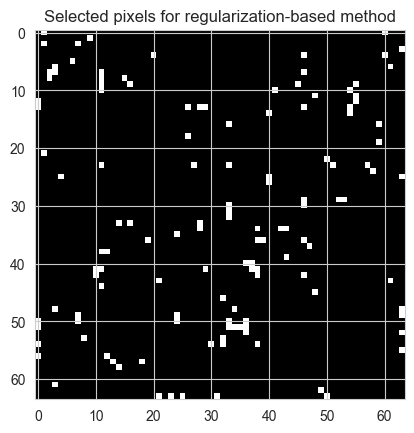

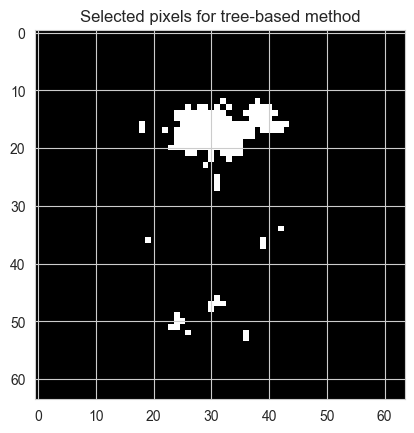

In [165]:
image = np.zeros((1, 4096))
image[0, most_selected_features_reg] = 1
plt.imshow(rotateM(np.reshape(image, (64, 64))), cmap='gray')
plt.title('Selected pixels for regularization-based method')
plt.show()

image = np.zeros((1, 4096))
image[0, most_selected_features_tree] = 1
plt.imshow(rotateM(np.reshape(image, (64, 64))), cmap='gray')
plt.title('Selected pixels for tree-based method')
plt.show()

### Reflection
Based on the results obtained from the feature selection techniques used in the classification of dogs and cats images, it appears that the regularization-based method tends to prioritize the pixels located at the outer edges of the silhouettes of the animals. On the other hand, the tree-based method assigns more importance to the pixels located on the forehead area between the ears, with some additional pixels in the mouth region.

it is difficult to determine the exact reason why certain pixels are considered more important than others, and it is also challenging to be confident in the selection of specific pixels. However, there are some pixels that are selected by both classifiers, which may suggest their importance.

### Impurity heat map code

In [20]:
from sklearn.ensemble import RandomForestClassifier
n_jobs = -1
forest = RandomForestClassifier(n_estimators=750, n_jobs=n_jobs, random_state=42)

forest.fit(train_features, train_labels)

RandomForestClassifier(n_estimators=750, n_jobs=-1, random_state=42)

Elapsed time to compute the importances: 0.263 seconds


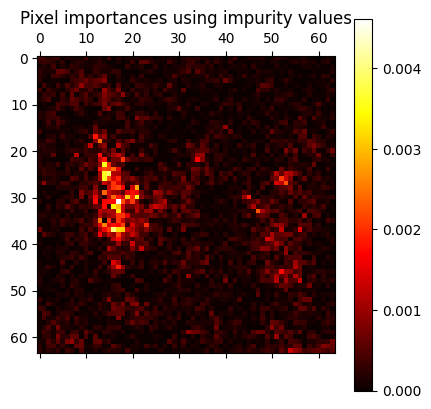

[2001 2384 1615 1614 1678 1486 1941 2064 2385 2129 1939 2386 2065 1813
 2318 2253 1165 1552 1870 1936 2159 1781 1679 2002 1550 2322 1809 2449
 1716 2194 1551 2004 2383 1744 1808 2257 1426 2193 2255 2327 1487 1940
 2897 1681 1965 1549 1100 1937 1422 2320 1876 1996 1357 2000 2996 2062
 1999 2513 1442 2321 1998 2445 1810 1877 2382 1553 1932 2424 2317 2195
 2832 2545 1779 1745 1875 1680 2319 2324 2066 2580 2073 4086 2387 1812
 3128 1871 1938 2452 1742 1361 2646 2447 1717 2420 2258 1227 2130 1780]
{2253, 1615, 2320, 1779, 1716, 2327}


In [22]:
import time
import matplotlib.pyplot as plt

start_time = time.time()
img_shape = (64, 64)
importances = forest.feature_importances_
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")
imp_reshaped = importances.reshape(img_shape)
plt.matshow(imp_reshaped, cmap=plt.cm.hot)
plt.title("Pixel importances using impurity values")
plt.colorbar()
plt.show()

important_indices = importances.argsort()[::-1]
hundred_important = important_indices[:len(selected_indices)]
print(hundred_important)
common_features = set(selected_indices).intersection(set(hundred_important))
print(common_features)

## Task 2
### Setting level of missingness

In [ ]:
#Procent of defected pictures
level1_procent_pictures = 0.2
level2_procent_pictures = 0.5

#Procent of defected pixels in each picture for random
level1_procent_pixels = 0.2
level2_procent_pixels = 0.6

#Procent of defected pixels in each picture for "bias"
level1_procent_overbias = 0.9
level1_procent_underbias = 0

level2_procent_overbias = 0.5
level2_procent_underbias = 0.06

### Generating "missing"-images random
#### For level 1

In [ ]:
#Create a copy of the dataset to defect
dataset_level1 = CATSnDOGS.copy()
labels_level1 = Labels.copy()

# Findes the index of the pictures to be damaged
nr_of_images = 99 + 99
defected_images_level1 = random.sample(range(0, nr_of_images-1), int(nr_of_images*level1_procent_pictures))

#Damages the shit
for index in defected_images_level1:
    picture = dataset_level1[index, :]
    
    delete_index = random.sample(range(0, len(picture)-1), int(len(picture)*level1_procent_pixels))

    for i in delete_index:
        picture[i] = 0
    
    dataset_level1[index, :] = picture

In [ ]:
#To visualize the defects
rows = 2
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
id = 0
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(rotateM(np.reshape(dataset_level1[defected_images_level1[id], :], (64, 64))), cmap='gray')
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")
        id += 1
plt.tight_layout()

#### For level 2

In [ ]:
# Creates a copy of the dataset
dataset_level2 = CATSnDOGS.copy()
labels_level2 = Labels.copy()

# Findes the index of the pictures to be damaged
nr_of_images = 99 + 99
defected_images_level2 = random.sample(range(0, nr_of_images-1), int(nr_of_images*level2_procent_pictures))

#Damages the shit
for index in defected_images_level2:
    picture = dataset_level2[index, :]
    
    delete_index = random.sample(range(0, len(picture)-1), int(len(picture)*level1_procent_pixels))

    for i in delete_index:
        picture[i] = 0
    
    dataset_level2[index, :] = picture

In [ ]:
#To visualize the defects
rows = 2
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
id = 0
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(rotateM(np.reshape(dataset_level2[defected_images_level2[id], :], (64, 64))), cmap='gray')
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")
        id += 1
plt.tight_layout()

### Generating "missing"-images with bias
#### Set bias

In [1]:
# Bilder med värde över detta kommer att muteras mer
bias = 0.9

### Level 1

In [ ]:
#Create a copy of the dataset to defect
dataset_level1 = CATSnDOGS.copy()
labels_level1 = Labels.copy()

# Findes the index of the pictures to be damaged
nr_of_images = 99 + 99
defected_images_level1 = random.sample(range(0, nr_of_images-1), int(nr_of_images*level1_procent_pictures))

#Damages the shit
for index in defected_images_level1:
    picture = dataset_level1[index, :]
    
    for i in range(len(picture)):
        r = np.random.rand()
        if picture[i] >= bias*max(picture):
            if r < level1_procent_overbias:
                picture[i] = 0
            
        else:
            if r < level1_procent_underbias:
                picture[i] = 0

    dataset_level1[index, :] = picture

In [ ]:
#To visualize the defects
rows = 2
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
id = 0
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(rotateM(np.reshape(dataset_level1[defected_images_level1[id], :], (64, 64))), cmap='gray')
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")
        id += 1
plt.tight_layout()

### Level 2

In [ ]:
# Creates a copy of the dataset
dataset_level2 = CATSnDOGS.copy()
labels_level2 = Labels.copy()

# Findes the index of the pictures to be damaged
nr_of_images = 99 + 99
defected_images_level2 = random.sample(range(0, nr_of_images-1), int(nr_of_images*level2_procent_pictures))


#Damages the shit
for index in defected_images_level2:
    picture = dataset_level2[index, :]
    
    for i in range(len(picture)):
        r = np.random.rand()
        if picture[i] >= bias*max(picture):
            if r < level2_procent_overbias:
                picture[i] = 0
            
        else:
            if r < level2_procent_underbias:
                picture[i] = 0

    dataset_level2[index, :] = picture

In [ ]:

#To visualize the defects
rows = 2
cols = 3
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))
id = 0
for i in range(rows):
    for j in range(cols):
        axes[i][j].imshow(rotateM(np.reshape(dataset_level2[defected_images_level2[id], :], (64, 64))), cmap='gray')
        axes[i][j].set_xlabel("")
        axes[i][j].set_ylabel("")
        id += 1
plt.tight_layout()